# La Réunion: download and plot with high resolution

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from matplotlib.colors import LightSource
from pygmrt.tiles import download_tiles, get_path
from scipy.ndimage import gaussian_filter

plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["font.size"] = 12
plt.rcParams["font.sans-serif"] = "Arial"

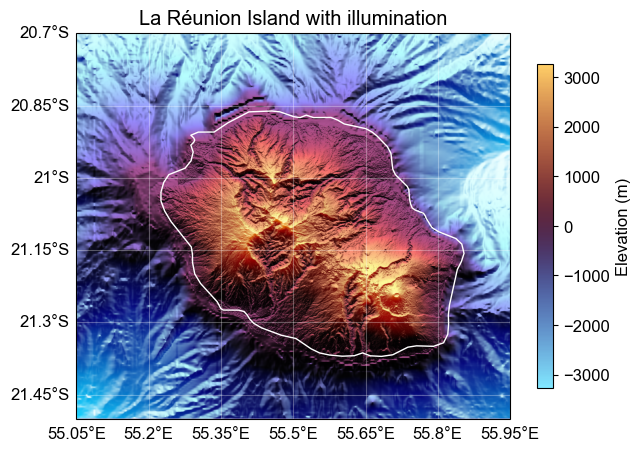

In [29]:
# La Réunion bbox [west, south, east, north]
bbox = [55.05, -21.5, 55.95, -20.7]
cmap = plt.cm.managua_r

# Download
tiles = download_tiles(bbox=bbox, resolution="medium")

# Remove NaNs and smooth a bit for better visualization
topo = tiles.read(1)
topo[np.isnan(topo)] = 0
vmax = abs(topo).max()
bbox = tiles.bounds
extent = (bbox.left, bbox.right, bbox.bottom, bbox.top)

# Create figure
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

# Hillshade
sun = LightSource(azdeg=0, altdeg=20)
shade = sun.shade(topo, cmap=cmap, vmin=-vmax, vmax=vmax)
ax.imshow(shade, extent=extent, origin="upper", transform=ccrs.PlateCarree())

# Extra map features
ax.coastlines(color="white")
ax.set_extent(extent)
gridlines = ax.gridlines(draw_labels=True, color="white", alpha=0.3)
gridlines.top_labels = False
gridlines.right_labels = False
colorbar = plt.cm.ScalarMappable(cmap=cmap)
colorbar.set_array(topo)
colorbar.set_clim(-vmax, vmax)
plt.colorbar(colorbar, ax=ax, label="Elevation (m)", shrink=0.6)
ax.set_title("La Réunion Island with illumination")

# Save figure
fig.savefig("reunion.svg")

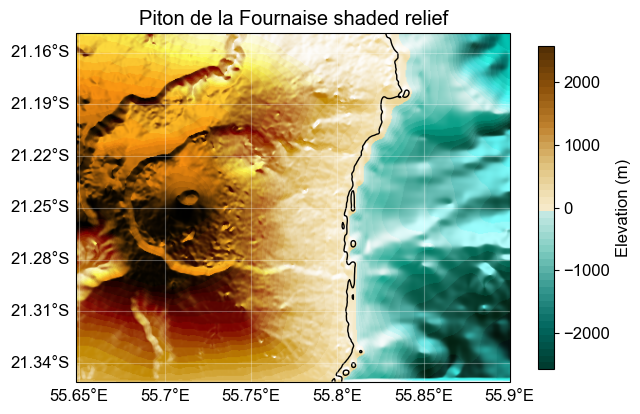

In [80]:
# Piton de la Fournaise
bbox = [55.65, -21.35, 55.9, -21.15]

# Colormap
n = 57
m = 10
cmap = plt.get_cmap("BrBG_r", n)
cmap = cmap(np.arange(cmap.N))
m_half = n // 2 - m // 2
cmap = np.vstack((cmap[:m_half], cmap[m_half + m :]))
cmap = plt.matplotlib.colors.ListedColormap(cmap)

# Download
tiles = download_tiles(bbox=bbox, resolution="medium")

# Remove NaNs and smooth a bit for better visualization
topo = tiles.read(1)
topo[np.isnan(topo)] = 0
topo = gaussian_filter(topo, sigma=1)
vmax = abs(topo).max()
bbox = tiles.bounds
extent = (bbox.left, bbox.right, bbox.bottom, bbox.top)

# Create figure
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

# Hillshade
sun = LightSource(azdeg=0, altdeg=20)
shade = sun.shade(topo, cmap=cmap, vmin=-vmax, vmax=vmax)
ax.imshow(shade, extent=extent, origin="upper", transform=ccrs.PlateCarree())

# Topo-inferred coastline
ax.contour(
    topo,
    levels=[-np.inf, 0, np.inf],
    colors="k",
    extent=extent,
    origin="upper",
    transform=ccrs.PlateCarree(),
    linewidths=1,
)

# Extra map features
ax.set_extent(extent)
gridlines = ax.gridlines(draw_labels=True, color="white", alpha=0.3)
gridlines.top_labels = False
gridlines.right_labels = False
colorbar = plt.cm.ScalarMappable(cmap=cmap)
colorbar.set_array(topo)
colorbar.set_clim(-vmax, vmax)
plt.colorbar(colorbar, ax=ax, label="Elevation (m)", shrink=0.6)
ax.set_title("Piton de la Fournaise shaded relief")

# Save figure
fig.savefig("piton.svg")